# <u>Self Practice 3</u>
Foundation of Data Engineering
***
Date: 31st October 2019<br>
Authored: Samuel Natamihardja<br>
Company: Homer Credit Indonesia

Instructions:<br>
1. Get your data from any sources including Web, Social Media, Portal, etc. by using either web scraping or API
technique
2. To the data that you’ve just got, do the pre-processing
3. Create the model and do the calculation to get your desired output of the data
4. Visualize your insights!


### <u>Import Python Modules</u>

In [59]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
# tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word, TextBlob

## <u>Section 1: Data Preparation</u>

### 1.1 Getting the authentication cretentials

In [60]:
# initialize api instance
consumer_key = 'ZIfvszwPC7Wh3HiOuL9DkoxXj'
consumer_secret = 'cNZYofUYxnnNmiEyAxxnKgGYVYAjLYwlgyX9BJS7GWqlwz7o5V'
access_token = '1102413440243515393-pDzDG25AtcIvHUn0uXAN45qu4vSJbv'
access_token_secret = 'TffqBFeIJUV1uc3jv3nwgGj4sQPgtjSeMAhN7PNkikFgJ'

#Authentication
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

### 1.2 Getting a Dataset from Twitter

In [61]:
# get tweet 
tweets = tp.Cursor(api.search,q="#papua",lang="en").items(500)
result = []
for tweet in  tweets :
    result.append(tweet)

### 1.3 Extract Tweet to pandas dataframe

this process is to extract data from twitter to pandas dataframe

#### Create function for extract twitter data to dataframe

In [62]:
# extract tweet to the pandas dataframe
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in results]
    df["created_at"] = [tweet.created_at for tweet in results]
    df["retweet_count"] = [tweet.retweet_count for tweet in results]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    df["user_location"] = [tweet.author.location for tweet in results]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    return df

#### Use the function above

In [63]:
# use the function to get dataframe of the tweet
df = tweets_df(result)
display(df.head())

rows, columns = df.shape
print('Dataframe consist of ',rows,' rows and ', columns, ' columns.')

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1189819764937347073,RT @jagowriter: Strong editorial on #Papua in ...,2019-10-31 08:21:52,95,KSwazey,547,"Yogyakarta, Indonesia","[{'text': 'Papua', 'indices': [36, 42]}]"
1,1189800736424648704,The 'Lost Rambos' of Papua New Guinea\n:: Stri...,2019-10-31 07:06:15,0,ReprobateCoZa,330,"Cape Town, South Africa","[{'text': 'documentary', 'indices': [56, 68]},..."
2,1189795449252777984,RT @MonitorSismico: #Sismo M 4.2 53km WNW of F...,2019-10-31 06:45:15,1,amounomalande,255,Guinea,"[{'text': 'Sismo', 'indices': [20, 26]}, {'tex..."
3,1189795425949118467,"#Sismo M 4.2 53km WNW of Finschhafen, #Papua N...",2019-10-31 06:45:09,1,MonitorSismico,19252,"Jalisco, Mexico","[{'text': 'Sismo', 'indices': [0, 6]}, {'text'..."
4,1189775129183539200,@febrofirdaus Why would Jakarta create new adm...,2019-10-31 05:24:30,0,Tom_Augustyniak,168,"Kuala Lumpur, Malaysia","[{'text': 'Papua', 'indices': [70, 76]}]"


Dataframe consist of  500  rows and  8  columns.


#### Eliminate any duplicate tweets for sentiment analysis purposes

In [64]:
#drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [65]:
display(dataframe.head())

rows, columns = dataframe.shape
print('Dataframe consist of ',rows,' rows and ', columns, ' columns.')

,text
0,Looking forward to seeing updated land use pla...
1,Take a #Vacation in Raja Ampat #Papua: Review ...
2,"After being inaugurated, President Jokowi visi..."
3,#Papua and #WestPapua always borne hero for #I...
4,if Papua is committed to a unity of welfare it...


Dataframe consist of  249  rows and  1  columns.


## <u>Section 2 : Data Preprocessing</u>

### 2.1 Basic Text Pre-processing

#### 2.1.1 Lower casing

In [66]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    looking forward to seeing updated land use pla...
1    take a #vacation in raja ampat #papua: review ...
2    after being inaugurated, president jokowi visi...
3    #papua and #westpapua always borne hero for #i...
4    if papua is committed to a unity of welfare it...
Name: text, dtype: object

#### 2.1.2 Punctuation removal

In [67]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,looking forward to seeing updated land use pla...
1,take a vacation in raja ampat papua review thi...
2,after being inaugurated president jokowi visit...
3,papua and westpapua always borne hero for indo...
4,if papua is committed to a unity of welfare it...


#### 2.1.3 Stopwords removal

In [68]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    looking forward seeing updated land use plans ...
1    take vacation raja ampat papua review paradise...
2    inaugurated president jokowi visited eastern i...
3    papua westpapua always borne hero indonesia ht...
4    papua committed unity welfare obtained westpap...
5    ada yang tanya kenapa foto pohon kelapa like b...
6    snapshot papua indonesia iflymaf changetheendi...
7    chestnut dunnart named chestnut colour upperpa...
8    take vacation raja ampat papua review paradise...
9    real indonesia hosts 2021 fifa u20 world cup f...
Name: text, dtype: object

#### 2.1.4 Frequent words removal

In [69]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

papua        197
indonesia     96
westpapua     55
rt            55
east          39
take          31
new           30
review        29
ampat         29
raja          29
dtype: int64

In [70]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    looking forward seeing updated land use plans ...
1            vacation paradise side httpstcoyt0fv1j5zm
2    inaugurated president jokowi visited eastern a...
3                 always borne hero httpstcoioq49s2dj0
4    committed unity welfare obtained httpstcotrtp0...
Name: text, dtype: object

#### 2.1.5 Rare words removal

In [71]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

combined              1
econ                  1
httpstcolstv1fdihf    1
httpstcodlblpwg68z    1
beat                  1
lahadalia             1
httpstcozmnqhp2rlt    1
council               1
bordered              1
budget                1
dtype: int64

In [72]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    looking forward seeing updated land use plans ...
1            vacation paradise side httpstcoyt0fv1j5zm
2    inaugurated president jokowi visited eastern a...
3                 always borne hero httpstcoioq49s2dj0
4    committed unity welfare obtained httpstcotrtp0...
Name: text, dtype: object

#### 2.1.6 Spelling correction

In [73]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    looking forward seeing updated land use plans ...
1            vacation paradise side httpstcoyt0fv1j5zm
2    inaugurated president jokowi visited eastern a...
3                 always borne hero httpstcoioq49s2dj0
4    committed unity welfare obtained httpstcotrtp0...
Name: text, dtype: object

#### 2.1.7 Tokenization

In [74]:
# TextBlob(dataframe['text'][1]).words

#### 2.1.8 Stemming

In [75]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [76]:
dataframe.head()

,text
0,look forward see updat land use plan greendeve...
1,vacat paradis side httpstcoyt0fv1j5zm
2,inaugur presid jokowi visit eastern acceler in...
3,alway born hero httpstcoioq49s2dj0
4,commit uniti welfar obtain httpstcotrtp0wjsiq


#### 2.1.9 Lematization

In [77]:
# from textblob import Word
# dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
# dataframe['text'].head()

## <u>Section 3: Data Exploration</u>

### 3.1 Basic Feature Extraction

#### 3.1.1 Number of words

In [78]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,look forward see updat land use plan greendeve...,9
1,vacat paradis side httpstcoyt0fv1j5zm,4
2,inaugur presid jokowi visit eastern acceler in...,9
3,alway born hero httpstcoioq49s2dj0,4
4,commit uniti welfar obtain httpstcotrtp0wjsiq,5


#### 3.1.2 Number of characters

In [79]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,look forward see updat land use plan greendeve...,9,68
1,vacat paradis side httpstcoyt0fv1j5zm,4,37
2,inaugur presid jokowi visit eastern acceler in...,9,86
3,alway born hero httpstcoioq49s2dj0,4,34
4,commit uniti welfar obtain httpstcotrtp0wjsiq,5,45


#### 3.1.3 Number of stopwords

In [80]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,look forward see updat land use plan greendeve...,9,68,0
1,vacat paradis side httpstcoyt0fv1j5zm,4,37,0
2,inaugur presid jokowi visit eastern acceler in...,9,86,0
3,alway born hero httpstcoioq49s2dj0,4,34,0
4,commit uniti welfar obtain httpstcotrtp0wjsiq,5,45,0


#### 3.1.4 Number of special characters

In [81]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,look forward see updat land use plan greendeve...,9,68,0,0
1,vacat paradis side httpstcoyt0fv1j5zm,4,37,0,0
2,inaugur presid jokowi visit eastern acceler in...,9,86,0,0
3,alway born hero httpstcoioq49s2dj0,4,34,0,0
4,commit uniti welfar obtain httpstcotrtp0wjsiq,5,45,0,0


### 3.2 Labelling using Polarity (Textblob)

#### 3.2.1 Prepare new Dataframe

In [82]:
#new df after removed duplicate text
new_df = dataframe
new_df.head()

#sentiment labeling 
text = new_df.text

#### 3.2.2 Labeling

In [83]:
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [84]:
new_df = new_df[['text','sentiment','sentimentclass']]
new_df

,text,sentiment,sentimentclass
0,look forward see updat land use plan greendeve...,0.000000,Netral
1,vacat paradis side httpstcoyt0fv1j5zm,0.000000,Netral
2,inaugur presid jokowi visit eastern acceler in...,0.000000,Netral
3,alway born hero httpstcoioq49s2dj0,0.000000,Netral
4,commit uniti welfar obtain httpstcotrtp0wjsiq,0.000000,Netral
...,...,...,...
244,reelect member un human right council 1017 evi...,0.142857,Positive
245,vacat paradis side httpstcozf9yxaplap,0.000000,Netral
246,t20worldcup line complet 6 associ member crick...,0.000000,Netral
247,saudi_gazett indonesian presid joko widodo off...,0.000000,Netral


#### 3.3.3 Aggregation Sentimentclass

In [85]:
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Netral,158,0.634538
1,Negative,33,0.132530
2,Positive,58,0.232932


#### 3.3.4 Sentiment Visualization

##### Barchart

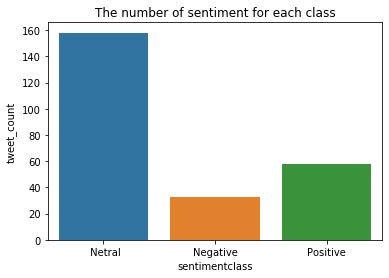

In [86]:
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

##### Pie Chart

(-1.1218231518549304,
 1.266834031114458,
 -1.1140169333862524,
 1.1265663525435334)

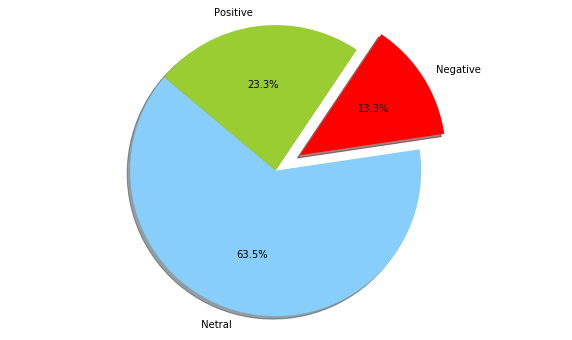

In [87]:
colors = [ 'lightskyblue','red','yellowgreen']
explode = (0, 0.2,0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

##### Wordcloud

In [99]:
#define Positive, Negative, Netral
Positive = new_df.loc[new_df['sentimentclass'] == "Positive"]
Negative  = new_df.loc[new_df['sentimentclass'] == "Negative"]
Netral  = new_df.loc[new_df['sentimentclass'] == "Netral"]

In [100]:
#merge all the comments into one paragraph
all_description_Positive = "".join(Positive.text.values)
all_description_Negative = "".join(Negative.text.values)
all_description_Netral = "".join(Netral.text.values)

In [102]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

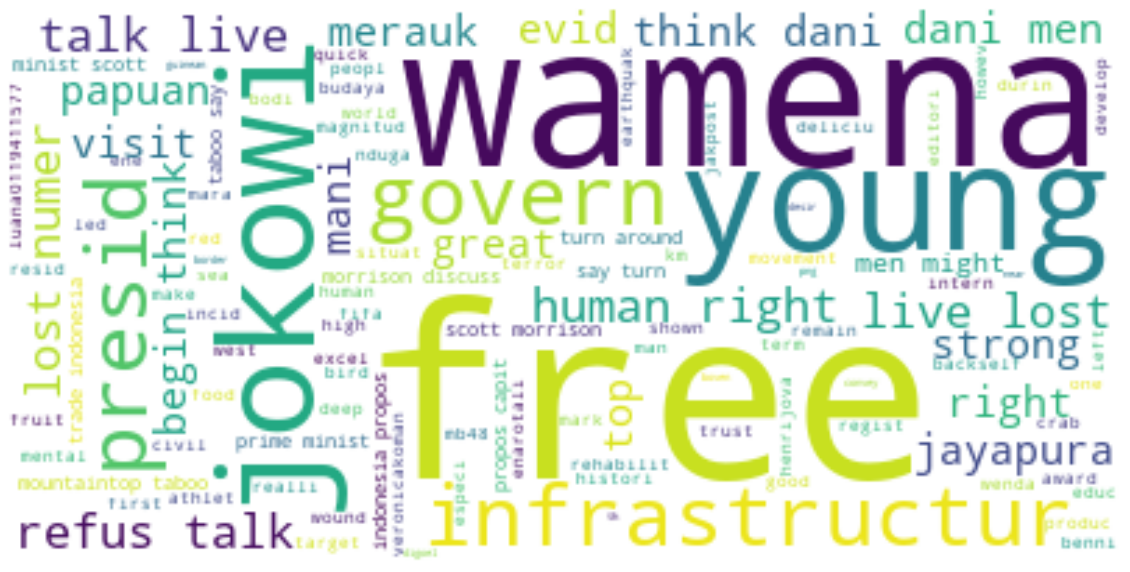

In [107]:
#Positive
plt.figure(figsize=(20,20))
create_word_cloud(all_description_Positive)

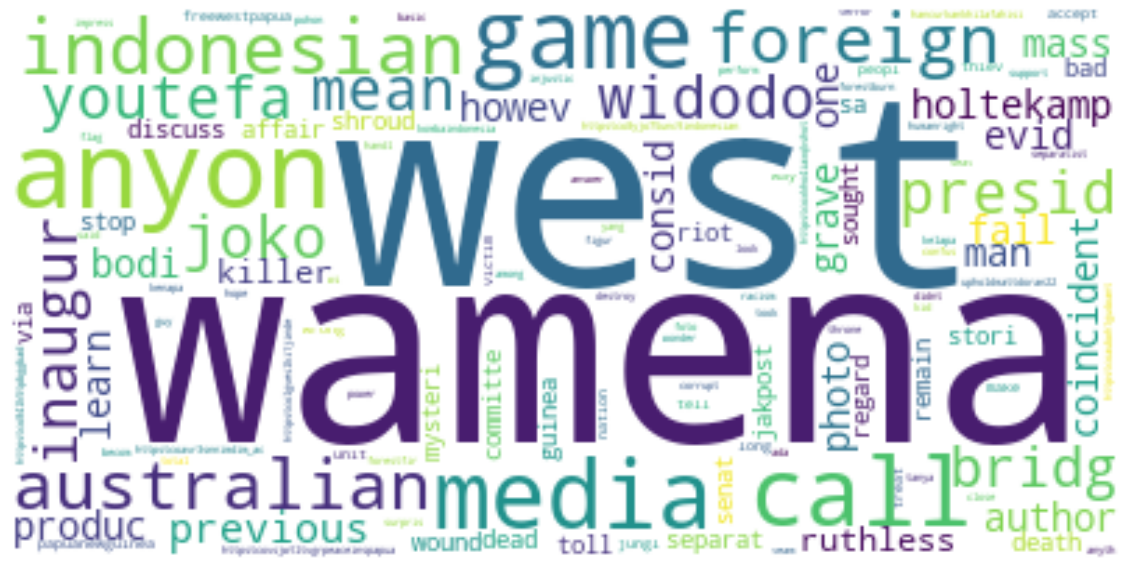

In [110]:
#Negative
plt.figure(figsize=(20,20))
create_word_cloud(all_description_Negative)